Implementación de una regresión lineal y calculando el Error Cuadrático Medio (ECM).

En estadística, el error cuadrático medio de un estimador mide el promedio de errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima. El ESCM es una función de riesgo, correspondiente al valor esperado de la pérdida del error al cuadrado o pérdida cuadrática. La diferencia se produce debido a la aleatoriedad o porque el estimador no tiene en cuenta la información que podría producir una estimación más precisa.

El ECM incorpora tanto la varianza del estimador así como su sesgo.


Si $\hat y$ es un vector de $n$ predicciones y $y$ es el vector de los verdaderos valores, entonces el ECM del predictor es:

$$\text{RMSE} = \frac{1}{n}\cdot \sum_{i=1}^{n}{(\hat y_i - y_i)^2} $$

Que al final de cuentas no es más que una regresión lineal. Si quisieramos graficar la linea obtendríamos sus parámetros de ls siguiente forma:


$$m = \frac{n \sum{xy-(\sum{x})(\sum{y})}}{n\sum{x^2}-(\sum{x)^2}}$$

$$b = \frac{\sum{y}- m(\sum{x})}{n} $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
# Vamos a hacer la linea recta que correspondera a y_hat
# Ya que ahí efectuamos la evaluación del erro predicho
def calc_m_b(data):
    # obtenemos n
    n = len(data)
    # obtenemos la suma de xy
    # Y sum x y sum y
    sum_xy = 0
    sum_x = 0
    sum_y = 0
    sum_x2 = 0
    for i in data:
        sum_xy += (i[0] * i[1])
        sum_x  += (i[0])
        sum_y  += (i[1])
        sum_x2 += (i[0])**2
    # Calculamos la pendiente
    m = (n * sum_xy - (sum_x * sum_y)) / ( (n * sum_x2) - (sum_x)**2 )
    # Ahora calculemos  b
    b = (sum_y - (m * sum_x) ) / (n)
    #Devolvemos valores
    return m,b

In [4]:
def y_hat_line(x,m,b):   
    return x*m + b

def ecm(data,m,b):
    n= len(data)
    y_hat = []
    add = 0
    for i in data:
        y_hat.append(y_hat_line(i[0],m,b) )
    #print(f'y_hat values:{y_hat}\n')
    
    for i in range(n):
        add += (( y_hat[i]) - (data[i][1]))**2
        print(f'Predicción {i+1}: {y_hat[i]}')
        print(f'Dato real {i+1}: {data[i][1]}')
    return (1/n)*add

In [5]:
def graph(x,data,line):
    #Creamos el cuadrito
    fig, ax = plt.subplots()
    ax.grid()
    plt.title('Función de coste')
    plt.xlabel("Gasto en publicidad")
    plt.ylabel("Ventas")
    ax.plot(x,line)
    for i in data:
        plt.plot(i[0], i[1], 'o')
    plt.legend(['Regresión lineal'])


Pendiente: 2.657142857142857
Intersección: 92.0
-------------------------------------
Predicción 1: 118.57142857142857
Dato real 1: 100
Predicción 2: 145.14285714285714
Dato real 2: 150
Predicción 3: 171.71428571428572
Dato real 3: 200
Predicción 4: 198.28571428571428
Dato real 4: 180
Predicción 5: 224.85714285714286
Dato real 5: 250
Predicción 6: 251.42857142857142
Dato real 6: 230
-------------------------------------
Error Cuadrático Medio: 432.3809523809521



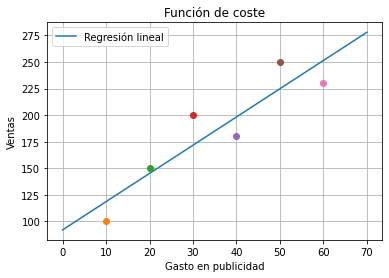

In [7]:
# Datos
res = 10000
x = np.linspace(0.0, 70.0, num=res)
data = [[10,100],[20,150],[30,200],[40,180],[50,250],[60,230]]
m,b = calc_m_b(data)
print(f'\nPendiente: {m}')
print(f'Intersección: {b}')
print(f'-------------------------------------')
line = y_hat_line(x,m,b)
ECM = ecm(data,m,b)
graph(x,data, line)
print(f'-------------------------------------')
print(f'Error Cuadrático Medio: {ECM}\n')

---